# Practical 1: Implementation in python of the Euler and Runge-Kutta approximation for solving numerical ODES

In [81]:
import numpy as np # We will be using this numerical package called numpy
import matplotlib.pyplot as plt
%matplotlib inline


def myEuler (f, a, b, h, x0):
    n = int((b-a)/h)
    x0 = x0
    t0 = a

    for i in range(1, n+1):
        x1 = x0 + f(t0, x0)*h
        x0 = x1
        t0 = t0+h
                
        print(x1)
       
    return x1


def myRungeKutta (f, a, b, h, x0):
    n = int((b-a)/h)
    x0 = x0;
    t0 = a;
    
    for i in range(1, n+1):
        k1 = h*f(t0, x0)
        k2 = h*f(t0 + 0.5*h, x0 + 0.5*k1)
        k3 = h*f(t0 + 0.5*h, x0 + 0.5*k2)
        k4 = h*f(t0 + h, x0 + k3)
        
        x1 = x0 + (1/6.)*(k1 + 2*k2 + 2*k3 + k4)
        
        x0 = x1
        t0 = t0+h
        
        print(x1)
        
    return x1

Populating the interactive namespace from numpy and matplotlib


In [82]:
f = lambda t, x: t**2 - np.exp(x)*np.sin(t)

print("Euler method \n")
myEuler(f, 0, 1, 0.25, 1);

print("\n \n Runge-Kutta method\n")
myRungeKutta(f, 0, 1, 0.25, 1);

Euler method 

1.0
0.8474965783174021
0.630276100846516
0.45084970982031936

 
 Runge-Kutta method

0.9239105984018461
0.7502240426784198
0.5688906791259903
0.44632726282672985


# Practical 2

The following shows the call to the function myRungeKutta and myEuler for equation:

\begin{equation}
 x'(t) = e^{t}
\end{equation}

and compare the graph of the approximation solution comparing with the exact solution: 

\begin{equation}
 x(t) = e^{t}.
\end{equation}

$\textbf{The Runge-Kutta provides much accurate result, and almost exact}.$

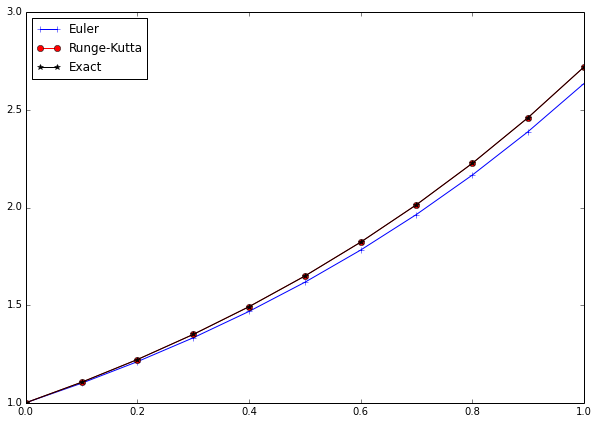

In [154]:
def myEuler (f, a, b, h, x0, x):
    n = int((b-a)/h)
    x0 = x0
    t0 = a
    
    xaxis = t0*np.ones(n+1, dtype=np.float64)
    approx_yaxis = x0*np.ones(n+1, dtype=np.float64)
    true_yaxis = x(t0)*np.ones(n+1, dtype=np.float64)
    
    for i in range(1, n+1):
        x1 = x0 + f(t0, x0)*h 
        x0 = x1
        t0 = t0+h
        xaxis[i] = t0
        approx_yaxis[i] = x0
        true_yaxis[i] = x(t0)
       
    return xaxis, approx_yaxis, true_yaxis


def myRungeKutta (f, a, b, h, x0, x):
    n = int((b-a)/h)
    x0 = x0;
    t0 = a;
    
    xaxis = t0*np.ones(n+1, dtype=np.float64)
    approx_yaxis = x0*np.ones(n+1, dtype=np.float64)
    true_yaxis = x(t0)*np.ones(n+1, dtype=np.float64)
    
    for i in range(1, n+1):
        k1 = h*f(t0, x0)
        k2 = h*f(t0 + 0.5*h, x0 + 0.5*k1)
        k3 = h*f(t0 + 0.5*h, x0 + 0.5*k2)
        k4 = h*f(t0 + h, x0 + k3)
        
        x1 = x0 + (1/6.)*(k1 + 2*k2 + 2*k3 + k4)
        
        x0 = x1
        t0 = t0+h
        
        xaxis[i] = t0
        approx_yaxis[i] = x0
        true_yaxis[i] = x(t0)
        
        
    return xaxis, approx_yaxis, true_yaxis






f = lambda t, x: np.exp(t)#t**2*x + t**2*np.sin(t**3)
x = lambda t: np.exp(t)#(-3/10.)*np.cos(t**3)-(1/10.)*np.sin(t**3)+(3/10.)*np.exp((1/10.)*t**3)+1

xaxis_eu, approx_yaxis_eu, true_yaxis_eu= myEuler(f, 0, 1, 0.1, 1, x)
xaxis_rk, approx_yaxis_rk, true_yaxis_rk = myRungeKutta(f, 0, 1, 0.1, 1, x)

#print (true_yaxis_rk, true_yaxis_eu)
plt.figure(figsize=(10,7))
#plt.subplot(211)
plt.plot(xaxis_eu, approx_yaxis_eu, 'b-+', label="Euler")
plt.plot(xaxis_eu, approx_yaxis_rk, 'r-o', label="Runge-Kutta")
plt.plot(xaxis_eu, true_yaxis_rk, 'k-*', label="Exact")


#plt.subplot(212)
#plt.plot(xaxis_eu, np.abs(true_yaxis_rk-approx_yaxis_eu), 'b', label="Error for Euler")
#plt.plot(xaxis_eu, np.abs(true_yaxis_rk-approx_yaxis_rk), 'r', label="Error for RK")
plt.legend(loc='best')
plt.show()